(-0.5, 639.5, 426.5, -0.5)

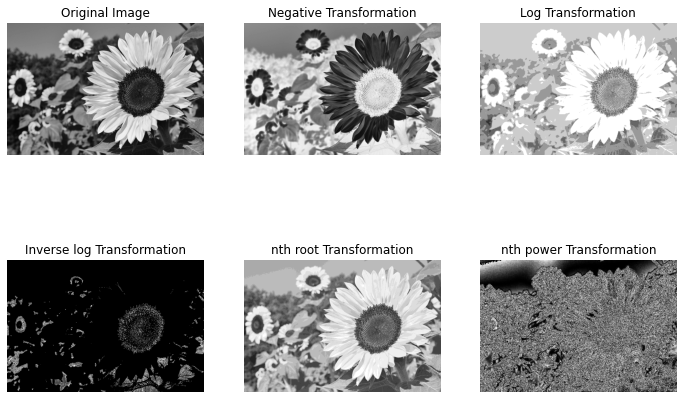

In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('sunflower.jpg',0)

rows, cols = img.shape
negated_image = np.zeros_like(img)
log_image = np.zeros_like(img)
inverseLog_image = np.zeros_like(img)
nth_root_image = np.zeros_like(img)
nth_power_image = np.zeros_like(img)

n = 2

for i in range(rows):
    for j in range(cols):
        negated_image[i,j] = 255 - img[i,j]
        log_image[i,j] = np.log(1 + img[i,j])
        inverseLog_image[i,j] = np.exp(img[i,j] - 1)
        nth_root_image[i,j] = np.power(img[i,j], 1/n)
        nth_power_image[i,j] = np.power(img[i,j], n)

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title("Original Image")
plt.axis('off') 
        
plt.subplot(2,3,2)
plt.imshow(negated_image, cmap = 'gray')
plt.title("Negative Transformation")
plt.axis('off') 

plt.subplot(2,3,3)
plt.imshow(log_image, cmap = 'gray')
plt.title("Log Transformation")
plt.axis('off') 

plt.subplot(2,3,4)
plt.imshow(inverseLog_image, cmap = 'gray')
plt.title("Inverse log Transformation")
plt.axis('off') 

plt.subplot(2,3,5)
plt.imshow(nth_root_image, cmap = 'gray')
plt.title("nth root Transformation")
plt.axis('off') 

plt.subplot(2,3,6)
plt.imshow(nth_power_image, cmap = 'gray')
plt.title("nth power Transformation")
plt.axis('off') 

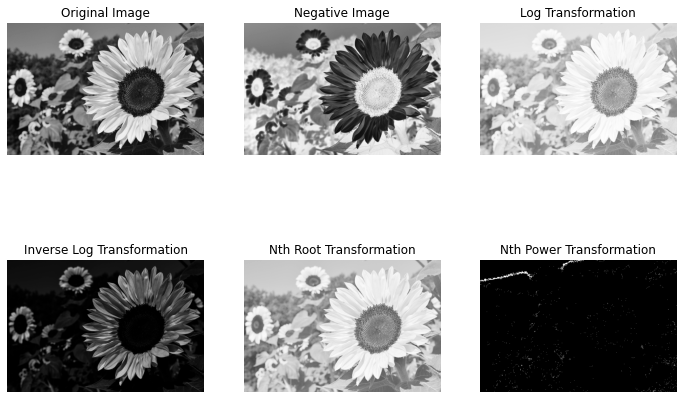

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('sunflower.jpg',0)

# 1. Negative Image
negative_image = 255 - image

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(1 + image))

# 3. Inverse Log Transformation
inverse_log_image = np.exp(image / c) - 1

# 4. Nth Root Transformation
n = 3  # Example for square root
nth_root_image = np.power(image, 1/n)

# 5. Nth Power Transformation
nth_power_image = np.power(image, n)


# Normalize images to the range 0-255 for display
log_image = np.uint8(log_image)
inverse_log_image = np.uint8(inverse_log_image)
nth_root_image = np.uint8(255 * nth_root_image / np.max(nth_root_image))
nth_power_image = np.uint8(255 * nth_power_image / np.max(nth_power_image))

# Display images
titles = ['Original Image', 'Negative Image', 'Log Transformation', 
          'Inverse Log Transformation', 'Nth Root Transformation', 'Nth Power Transformation']

images = [image, negative_image, log_image, inverse_log_image, nth_root_image, nth_power_image]

plt.figure(figsize = (12,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()


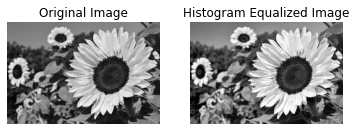

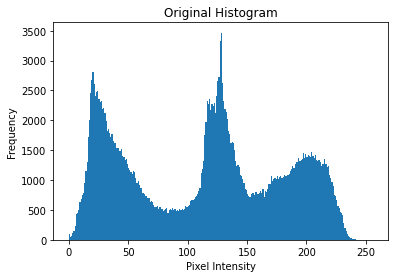

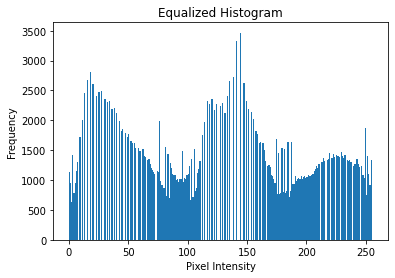

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Calculate the histogram
hist = np.zeros(256)
rows, cols = image.shape
for i in range(rows):
    for j in range(cols):
        hist[image[i, j]] += 1

# Step 2: Calculate the cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + hist[i]

# Step 3: Normalize the CDF
cdf_min = cdf.min()
cdf_max = cdf.max()
cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
cdf_normalized = cdf_normalized.astype('uint8')

# Step 4: Map the original gray levels to the equalized gray levels
equalized_image = np.zeros_like(image)
for i in range(rows):
    for j in range(cols):
        equalized_image[i, j] = cdf_normalized[image[i, j]]

# Display the original and equalized images
titles = ['Original Image', 'Histogram Equalized Image']
images = [image, equalized_image]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Display original histogram
plt.figure()
plt.title('Original Histogram')
plt.hist(image.flatten(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display equalized histogram
plt.figure()
plt.title('Equalized Histogram')
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
